# Exploratory Analysis & Statistical Inference

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Upload Data

Upload User Data - *User song play counts and play indicator (y=1 if song listened to)* 

In [2]:
users_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 1_Mus_Recomend/Data/msd_user_data.csv')

users = pd.read_csv(users_path, na_values = 'NaN', index_col = 0)

users.index.names = ['index']

print(users.info())

users.head()

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48373586 entries, 0 to 48373585
Data columns (total 4 columns):
user_id       object
song_id       object
play_count    int64
play          int64
dtypes: int64(2), object(2)
memory usage: 1.8+ GB
None


,user_id,song_id,play_count,play
index,,,,
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,1


Upload Song Metadata - *Song Features & Characteristics*

In [3]:
songs_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 1_Mus_Recomend/Data/msd_song_metadata.csv')

songs = pd.read_csv(songs_path, na_values = 'NaN', index_col = 0)

songs.index.names = ['index']

print(songs.info())

songs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905712 entries, 0 to 981021
Data columns (total 51 columns):
artist_7digitalid                 905712 non-null int64
artist_familiarity                905531 non-null float64
artist_hotttnesss                 905700 non-null float64
artist_id                         905712 non-null object
artist_latitude                   325985 non-null float64
artist_location                   460185 non-null object
artist_longitude                  325985 non-null float64
artist_mbid                       847639 non-null object
artist_name                       905712 non-null object
artist_playmeid                   905712 non-null int64
idx_artist_terms                  905712 non-null int64
idx_similar_artists               905712 non-null int64
release                           905707 non-null object
release_7digitalid                905712 non-null int64
song_hotttnesss                   551532 non-null float64
song_id                           

,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,...,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id,idx_artist_mbtags,year
index,,,,,,,,,,,,,,,,,,,,,
0,4069,0.649822,0.394032,ARYZTJS1187B98C555,NaN,NaN,NaN,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,44895,...,-4.829,0,0.688,236.635,87.002,4,0.940,TRMMMYQ128F932D901,0,2003.0
1,113480,0.439604,0.356992,ARMVN3U1187FB3A1EB,NaN,NaN,NaN,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,-1,...,-10.555,1,0.355,148.660,150.778,1,0.000,TRMMMKD128F425225D,0,1995.0
2,63531,0.643681,0.437504,ARGEKB01187FB50750,55.8578,"Glasgow, Scotland",-4.24251,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,-1,...,-2.060,1,0.566,138.971,177.768,4,0.446,TRMMMRX128F93187D9,0,2006.0
3,65051,0.448501,0.372349,ARNWYLR1187B9B2F9C,NaN,NaN,NaN,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,34000,...,-4.654,1,0.451,138.687,87.433,4,0.000,TRMMMCH128F425532C,0,2003.0
4,158279,0.000000,0.000000,AREQDTE1269FB37231,NaN,NaN,NaN,NaN,Der Mystic,-1,...,-7.806,0,0.290,506.717,140.035,4,0.315,TRMMMWA128F426B589,0,NaN


Upload Artist Tags - *Artist Genre Description from MusicBrainz and Echo Nest*

In [4]:
artist_tags_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 1_Mus_Recomend/Data/msd_tags.csv')

artist_tags = pd.read_csv(artist_tags_path, index_col = 0, na_values = 'NaN',
                        dtype = {0:'int', 1:'str',2:'str',3:'str'})

artist_tags.index.names = ['index']

print(artist_tags.info())

artist_tags.head()

/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1621124 entries, 0 to 1621123
Data columns (total 3 columns):
artist_id    1621124 non-null object
mbtag        798145 non-null object
terms        1621118 non-null object
dtypes: object(3)
memory usage: 49.5+ MB
None


,artist_id,mbtag,terms
index,,,
0,AR002UA1187B9A637D,uk,garage rock
1,AR002UA1187B9A637D,uk,country rock
2,AR002UA1187B9A637D,uk,free jazz
3,AR002UA1187B9A637D,uk,oi
4,AR002UA1187B9A637D,uk,space rock


## Part 1. Basic Song Catalog Exploration

In [5]:
#Extract Basic Song Features from the songs dataset

basic_features = songs[['artist_familiarity','artist_hotttnesss','artist_id',
                                'song_hotttnesss','song_id','danceability','duration',                                
                                'energy','key','loudness','mode','tempo','time_signature','year']]

basic_features.describe()

,artist_familiarity,artist_hotttnesss,song_hotttnesss,danceability,duration,energy,key,loudness,mode,tempo,time_signature,year
count,905531.000000,905700.000000,551532.000000,905712.0,905712.000000,905712.0,905712.000000,905712.000000,905712.000000,905712.000000,905712.000000,456811.000000
mean,0.552926,0.375825,0.350871,0.0,246.913997,0.0,5.310544,-10.163313,0.668136,123.840877,3.591662,1998.948718
std,0.136430,0.124020,0.232737,0.0,124.880635,0.0,3.594880,5.242631,0.470883,35.282309,1.227227,10.292170
min,0.000000,0.000000,0.000000,0.0,0.313020,0.0,0.000000,-58.178000,0.000000,0.000000,0.000000,1922.000000
25%,0.475977,0.334415,0.215080,0.0,179.930980,0.0,2.000000,-12.736000,0.000000,97.725000,3.000000,1995.000000
50%,0.555851,0.384529,0.375984,0.0,227.787300,0.0,5.000000,-8.994000,1.000000,121.689000,4.000000,2002.000000
75%,0.636053,0.440371,0.525961,0.0,286.406080,0.0,9.000000,-6.386000,1.000000,144.900000,4.000000,2006.000000
max,1.000000,1.082503,1.000000,0.0,3034.905670,0.0,11.000000,4.318000,1.000000,302.300000,7.000000,2011.000000


**Overall Song Characteristics Observations:** 

* Looking at the means it seems artist familiarity is 0.55, it falls somewhat in the middle of the  possible values of 0 to 1. 
* Artist hottness and song hottness mean values skew towards the lower range of hottness. 
* In terms of song duration, the mean song is 4.10 minutes (which sounds accurate).
* The mean loudness of the tracks is -10.16, which suggests many of the tracks are not in the extreme of loudness (since this value is far away from max loudness of 4.31)
* The average key is 5.31 (this is around B major or D flat major (which is the same as C# major))
* The mean beats per minute (tempo) is 123. Which means the mean song is in Allegro tempo: fast, quick, and bright.
* The mean mode is 0.66, there is an skew towards songs in the major scale. 
* The mean time signature if 3.59 and the 75% percentile is 4. This means most songs are in 4/4 time signature.
* The mean year of release if 1998, with aprox. 25% of songs released between 2006 and 2011.

**Missing Values**

* Danceability and Energy do not have values at all (i.e were not analyzed).
* Artist familiarity has some missing values, but not a lot.
* Song hottness and year have a significant amount of missing values.

In [6]:
# drop danceability and energy since all their values are zeroes

basic_features = basic_features.drop(['danceability','energy'], axis = 1)

In [7]:
#Get number of unique artists & songs

print('Unique Artists:', basic_features['artist_id'].nunique())

print('Unique Songs:', basic_features['song_id'].nunique())

Unique Artists: 44421
Unique Songs: 905712


There are 44,421 unique artists and 905,712 unique songs represented in the dataset.

([<matplotlib.axis.XTick at 0x1a0d5ce780>,
 <a list of 12 Text xticklabel objects>)

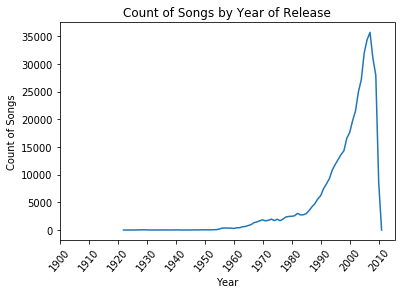

In [8]:
#Get count of songs by year

yearly_songs = basic_features[['year','song_id']].groupby('year',as_index=False).count()

#Graph of songs by year

yearly_songs.plot('year','song_id',legend=None)

plt.ylabel('Count of Songs')

plt.xlabel('Year')

plt.title('Count of Songs by Year of Release')

plt.grid(False)

x_ticks=np.arange(1900,2020,10)

plt.xticks(x_ticks,rotation = 50)

Year of release heavily skews to recent releases with a sharp peak in the 2000's. However, year data is not complete, I have year data for 456,811 songs or 50% of the song dataset. I am unsure if the missing values are random or systematic, an example of this would be older songs tending to have missing values for year.

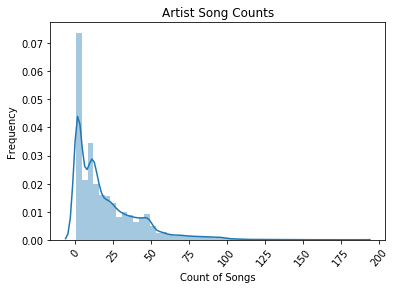

In [9]:
#Get count of songs by artist

artist_songs = basic_features[['artist_id','song_id']].groupby('artist_id',as_index=False).count()

#Songs by artist

sns.distplot(artist_songs.song_id, norm_hist=True)

plt.ylabel('Frequency')

plt.xlabel('Count of Songs')

plt.title('Artist Song Counts')

plt.xticks(rotation = 50)

plt.grid(False)

Artist song counts seems to have some peaks.

## Part 2. User Play Indicator Data Exploration and Inference

### A. Descriptive Statistics

In recommender systems, it is best practice to treat implicit feedback as 0 or 1 (1 = consumed, 0 = not consumed), rather than using how much of the item was consumed. This is to prevent overfitting. How much it was consumed (i.e) play counts can be used as metrics of 'confidence' or 'intensity'. Below I grouped and summed the play indicator by user id. This is to understand at a basic level how many song plays interactions each individual user has.

In [10]:
# Group the users dataset by user id. Sum the play indicator by user id. 

user_plays = users[['user_id','play','play_count']].groupby('user_id',as_index=False).sum()

user_plays.sort_values('play',inplace=True, ascending=False)

user_plays.head()

,user_id,play,play_count
941420,ec6dfcf19485cb011e0b22637075037aae34cf26,4400,5260
559999,8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,1651,2748
1015155,fef771ab021c200187a419f5e55311390f850a50,1614,2957
358880,5a3417a1955d9136413e0d293cd36497f5e00238,1604,1732
768700,c1255748c06ee3f6440c51c439446886c7807095,1566,5288


**Calculate descriptive statistics of the user_plays dataset.**

In [11]:
user_plays.describe()

,play,play_count
count,1.019318e+06,1.019318e+06
mean,4.745682e+01,1.360520e+02
std,5.781573e+01,1.845255e+02
min,1.000000e+01,1.000000e+01
25%,1.600000e+01,3.400000e+01
50%,2.700000e+01,7.300000e+01
75%,5.500000e+01,1.630000e+02
max,4.400000e+03,1.313200e+04


**Observations:**

* There are 1.019M unique users.
* The play indicator has a mean of 47.45 and an standard deviation of 57.82. This means that the average user has listened to 47.45 unique different songs.
* The percentile distribution suggests a long tail somewhere. The 75% percentile is 55 songs and the max song plays is 4,400 songs.

### B. Normality Testing: Histogram, Actual ECDF, Theoretical ECDF,  Skew, Kurtosis, D’Agostino-Pearson’s Test & Anderson-Darling Test

> Plot histograms of the user song plays indicator.

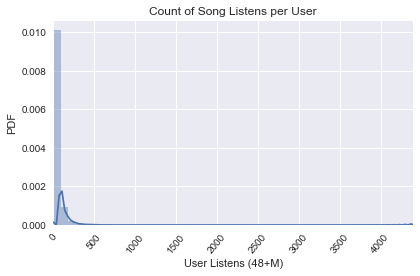

In [12]:
sns.set()

sns.distplot(user_plays.play,norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('User Listens (48+M)')

plt.title('Count of Song Listens per User')

plt.xlim([0,4400])

plt.xticks(rotation = 50)

plt.tight_layout()

([<matplotlib.axis.XTick at 0x1a0db27320>,
 <a list of 11 Text xticklabel objects>)

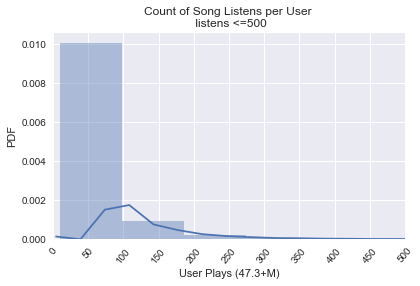

In [13]:
#Histogram of listens when user plays <=500

sns.distplot(user_plays.play)

plt.ylabel('PDF')

plt.xlabel('User Plays (47.3+M)')

plt.title('Count of Song Listens per User \n listens <=500')

plt.xlim([0,500])

x_ticks=np.arange(0,550,50)

plt.tight_layout()

plt.xticks(x_ticks,rotation = 50)

The two histograms above suggests a very long tail starting somewhere below 175 user song plays. The distribution **does not look** normal.

> **The next five (5) cells create ECDF plots of actual and theoretically normal user listens data. Compare actual distribution to theoretically normal distribution.**

In [14]:
# Define function to calculate ECDF

def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements.
    
    ECDF is the empirical cumulative distribution function (cdf), 
    
    f, evaluated at the points in x, using the data in the vector y"""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

> Create theoretically normal distribution of the user play indicator.

In [15]:
# Calculate mean of  and standard deviation of user play indicator

mean_user_play = np.mean(user_plays.play)

std_user_play = np.std(user_plays.play)

#Generate 1.019+M samples (the same as sample size) from mean and standard deviation. Set seed to 42.

np.random.seed(42)

samples = np.random.normal(mean_user_play, std_user_play, size=1019318)

> Calculate ECDF of actual and theorectical user plays.

In [16]:
#Calculate actual and theoretical ECDF of user plays

x, y = ecdf(user_plays.play)

x_theor, y_theor = ecdf(samples)

> Graph ECDF plot of actual user plays.

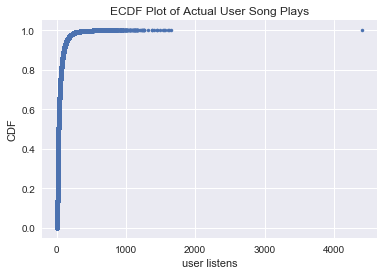

In [17]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none')

plt.title('ECDF Plot of Actual User Song Plays')

plt.xlabel('user listens')

plt.ylabel('CDF')

plt.show()

> Graph ECDF plot of theoretically normal user plays.

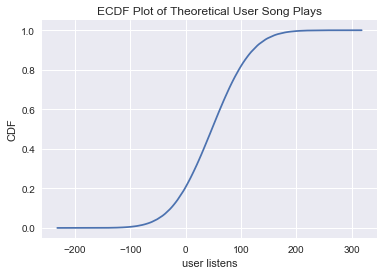

In [18]:
#Graph theoretical sample distribution

plt.plot(x_theor, y_theor)

plt.title('ECDF Plot of Theoretical User Song Plays')

plt.xlabel('user listens')

plt.ylabel('CDF')

plt.show()

**Comparison of Actual ECDF and Theoretically Normal ECDF:** There is a large difference between the shape and range of the actual distribution and the theoretically normal distribution. It is worth noting that in this case, negative values are physically imposible, an user cannot have negative listens.

Calculate Basic Distribution Statistics

In [19]:
stats.describe(user_plays.play)

DescribeResult(nobs=1019318, minmax=(10, 4400), mean=47.45681524313316, variance=3342.658708282296, skewness=4.82622346101333, kurtosis=68.50330155504909)

The kurtosis and skewedness statistics suggest high levels of positive skewdness and kurtosis.

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [20]:
# D’Agostino and Pearson’s Normality Test

print('D’Agostino and Pearson’s: ',stats.normaltest(user_plays.play))

# Anderson-Darling Normality Test

print('Anderson-Darling: ',stats.anderson(user_plays.play))

D’Agostino and Pearson’s:  NormaltestResult(statistic=1059797.831946297, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=105800.29039414553, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


**Normality Tests Results:** 

* **D’Agostino and Pearson’s Test:** The test p-value is less than the set alpha level of 0.05. In this case, the null hypothesis is rejected and accept the hypothesis that the distribution is not normal.

* **Anderson-Darling Test:** The statistic is much greater than the critical values, at all levels of statistical significance. This means the null hypothesis that the distrinution is normal can be rejected and accept that is not normal.

**Normality Testing Conclusions:** 

* The histogram, ECDF plots, Kurtosis, Skewdness and the D’Agostino and Pearson’s Normality Test suggests that the user play data as it currently stands is **not normally distributed**.

**Central Limit Theorem:** I cautiously say that this data satifies the central limit theorem.

* Independence: To satisfy this condition we will need to assume that an user's play count is independent of the play count of another user. This seems to me like a reasonable assumption. Nonetheless, it is unclear if this sample is 10% of the population. The echo nest claims that this sample is a small subset of their music universe, how small is unclear. Find info here: http://blog.echonest.com/post/11992136676/taste-profiles-get-added-to-the-million-song

* Randomness: The Echo Nest randomly selected a sample of users whose play counts matched to the song ID's in the dataset.

* Sample Size > 30: The sample size is greater than 30.

### C. Confidence Interval Using Bootstrap

I will use the bootstrap method to calculate confidence intervals for the mean, because the sample distribution is NOT normal. Parametric confidence interval formulas assume the sample is normal.

In [21]:
#Define bootstrap function

def bs_sample(v, function, size = 10000):    
    
    ''' Take a 1d array, generate bootstrap samples of the same size as the data, and 
    calculate replicates of each bootstrap sample. Return an array of replicates of the same size as 
    bootstrap samples.'''
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

Generate Bootstrap Replicates of the Users Plays Mean

In [22]:
n_tries = 10000

user_plays_mean_replicates = bs_sample(user_plays.play,np.mean,n_tries)

Create ECDF and Histogram Plots Bootstrapped Means

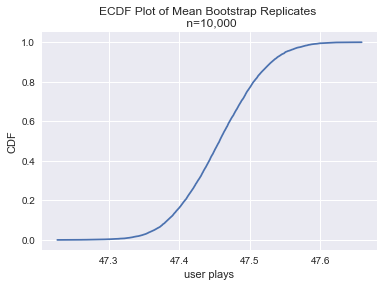

In [23]:
#Calculate ECDF

x1, y1 = ecdf(user_plays_mean_replicates)

#Graph actual cumulative sample distribution

plt.plot(x1, y1)

plt.title('ECDF Plot of Mean Bootstrap Replicates \n n=10,000')

plt.xlabel('user plays')

plt.ylabel('CDF')

plt.show()

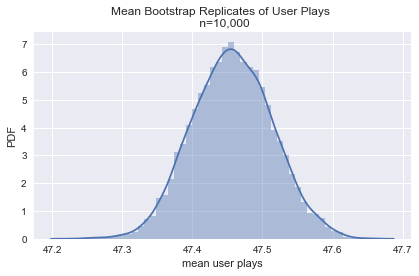

In [24]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(user_plays_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean user plays')

plt.title('Mean Bootstrap Replicates of User Plays \n n=10,000')

plt.tight_layout()

In [25]:
stats.describe(user_plays_mean_replicates)

DescribeResult(nobs=10000, minmax=(47.22700668486184, 47.658447118563586), mean=47.45698742649497, variance=0.003272903070874329, skewness=-0.003623643315682341, kurtosis=-0.05632406728254047)

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 47.45.

Calculate Confidence Interval & P-value of the Mean

In [26]:
#Bootstrap confidence interval

ci_user_plays = np.percentile(user_plays_mean_replicates,[2.5,97.5])

print('Bootstrap Mean Replicates 95% CI: ',ci_user_plays)

Bootstrap Mean Replicates 95% CI:  [47.34795407 47.5705959 ]


The bootstrap mean replicates showes a 95% confidence interval for the population mean is between 47.34 and 47.57. This confidence interval is very close together. This range contains our sample mean of 47.45.

### D. Hypothesis Testing Using Bootstrap  Mean Replicates

The hypotheses to be tested are: 

> H0: Population mean is 47.45 user song plays.

> Ha: Population mean is not 47.45 user song plays.

> alpha = 0.05

In [27]:
user_mean = np.mean(user_plays.play)

In [28]:
print('P-value of user plays mean replicates: ', sum(user_plays_mean_replicates <= user_mean)/n_tries)

P-value of user plays mean replicates:  0.4996


We cannot reject the null hypothesis that the population mean is 47.45 user plays.

### E. Hypothesis Testing Using a T-Test

* Since the sample seems to satisfy the central limit theorem (but not sample normality) I will use a t-test.
* I am using a one-sample hypothesis testing approach because I do not have a second user-play sample distribution to compare to.

> H0: Population mean is 47.45 user song plays.

> Ha: Population mean is not 47.45 user song plays.

> alpha = 0.05

In [29]:
stats.ttest_1samp(user_plays.play,47.45)

Ttest_1sampResult(statistic=0.11901184344418661, pvalue=0.9052659962122818)

The p-value is above the alpha level of 0.05. This suggets that we cannot reject the null hypothesis that the population mean is 47.45.

**Sample Mean Hypothesis Testing & Distribution Conclusions**

**1-** The distribution is not normal.

**2-** According to the bootstrap replicates of the mean and the one sample t-test it is likely that the population user plays indicator mean is around 47.45 songs.

**3-** There are several factors that could be driving these results and creating a peculiar user plays distribution:

* The user play dataset is very large. 
* The data was in a certain timeframe and procedure and we do not have full user listening history.
* The song data was extracted in December of 2011 which is holiday season, which could affect the user song play behaviour.
* There are specific characteristics of the user with high user play interactions (such as business customer, several people in the same account etc.). 
* The structure of the music industry, in which a few songs/artists create hits and most working artists do not.

## Part 3. Song Listen Data Exploration and Inference

### A. Descriptive Statistics

Below I grouped and summed the play indicator by song id. This is to understand at a basic level how many unique user interactions each individual song has.

In [30]:
# Group the users dataframe by song id. Sum the play indicator by song id.

song_plays = users[['song_id','play','play_count']].groupby('song_id',as_index=False).sum()

song_plays.sort_values('play',inplace=True, ascending=False)

song_plays.head()

,song_id,play,play_count
90798,SOFRQTD12A81C233C0,110479,425463
12936,SOAUWYT12A81C206F1,90476,648239
14339,SOAXGDH12A8C13F8A1,90444,356533
25043,SOBONKR12A58A7A7E0,84000,726885
287415,SOSXLTC12AF72A7F54,80656,527893


**Calculate descriptive statistics of the song_plays dataset.**

In [31]:
song_plays.describe()

,play,play_count
count,384546.000000,384546.000000
mean,125.794017,360.633690
std,799.025834,3256.809395
min,1.000000,1.000000
25%,4.000000,8.000000
50%,13.000000,32.000000
75%,52.000000,133.000000
max,110479.000000,726885.000000


**Observations:**

* There are 384,546 unique songs that have been listened to. **This means that 42% of the song dataset has been listened to.** 
* **As shown in the previous section, at most an user as listed to 4,400 and the average user has listened to 47.45 songs. We can conclude that the song catalog and user listens are sparsely distributed (most users have listened to an small portion of the available catalog).**
* The play indicator has a mean of 125.79 and an standard deviation of 799. This means that the average song has 125.79 for different unique listens.
* The percentile distribution suggests a long tail somewhere. The 75% percentile is 52 songs and the max song plays is 110,479 unique user listens.

### B. Normality Testing: Histogram, Actual ECDF, Theoretical ECDF,  Skew, Kurtosis, D’Agostino-Pearson’s Test & Anderson-Darling Test

> Plot histograms of the user song plays indicator.

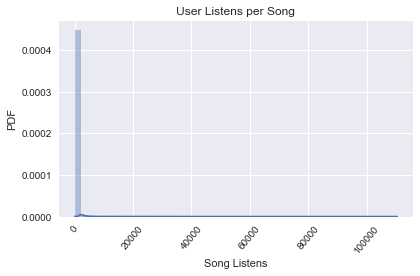

In [32]:
sns.set()

sns.distplot(song_plays.play,norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('Song Listens')

plt.title('User Listens per Song')

plt.xticks(rotation = 50)

plt.tight_layout()

([<matplotlib.axis.XTick at 0x1a0c8f0c18>,
 <a list of 10 Text xticklabel objects>)

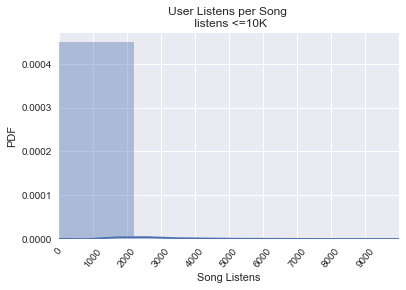

In [33]:
#Histogram of song listens when song plays <=10000

sns.distplot(song_plays.play)

plt.ylabel('PDF')

plt.xlabel('Song Listens')

plt.title('User Listens per Song \n listens <=10K')

plt.xlim([0,10000])

x_ticks=np.arange(0,10000,1000)

plt.tight_layout()

plt.xticks(x_ticks,rotation = 50)

The two histograms above suggests a very long tail somewhere. The distribution **does not look** normal.

>  **The next five (5) cells create ECDF plots of actual and theoretically normal user listens data. Compare actual distribution to theoretically normal distribution.**

> Create theoretically normal distribution of the song play indicator.

In [34]:
# Calculate mean of  and standard deviation of sonhg play indicator

mean_song_play = np.mean(song_plays.play)

std_song_play = np.std(song_plays.play)

#Generate 384,546 samples (the same as sample size) from mean and standard deviation. Set seed to 42.

np.random.seed(42)

samples2 = np.random.normal(mean_song_play, std_song_play, size=384546)

> Calculate ECDF of actual and theorectical song plays.

In [35]:
#Calculate actual and theoretical ECDF of song plays

x2, y2 = ecdf(user_plays.play)

x_theor2, y_theor2 = ecdf(samples2)

> Graph ECDF plot of actual song plays.

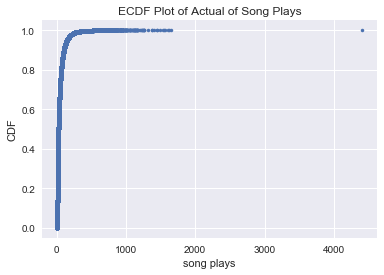

In [36]:
#Graph actual cumulative sample distribution

plt.plot(x2, y2, marker='.', linestyle='none')

plt.title('ECDF Plot of Actual of Song Plays')

plt.xlabel('song plays')

plt.ylabel('CDF')

plt.show()

> Graph ECDF plot of theoretically normal song plays.

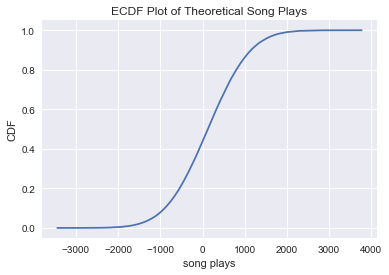

In [37]:
#Graph theoretical sample distribution

plt.plot(x_theor2, y_theor2)

plt.title('ECDF Plot of Theoretical Song Plays')

plt.xlabel('song plays')

plt.ylabel('CDF')

plt.show()

**Comparison of Actual ECDF and Theoretically Normal ECDF:** There is a large difference between the shape and range of the actual distribution and the theoretically normal distribution. It is worth noting that in this case, negative values are physically imposible, an song cannot have negative listens.

Calculate Basic Distribution Statistics

In [38]:
stats.describe(song_plays.play)

DescribeResult(nobs=384546, minmax=(1, 110479), mean=125.79401684063805, variance=638442.2838941452, skewness=46.11085781524981, kurtosis=3780.299084948111)

The kurtosis and skewedness statistics suggest high levels of positive skewdness and kurtosis.

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [39]:
# D’Agostino and Pearson’s Normality Test

print('D’Agostino and Pearson’s: ',stats.normaltest(song_plays.play))

# Anderson-Darling Normality Test

print('Anderson-Darling: ',stats.anderson(song_plays.play))

D’Agostino and Pearson’s:  NormaltestResult(statistic=1176273.1846225634, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=110035.21528571064, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


**Normality Tests Results:** 

* **D’Agostino and Pearson’s Test:** The test p-value is less than the set alpha level of 0.05. In this case, the null hypothesis is rejected and accept the hypothesis that the distribution is not normal.

* **Anderson-Darling Test:** The statistic is much greater than the critical values, at all levels of statistical significance. This means the null hypothesis that the distrinution is normal can be rejected and accept that is not normal.

**Normality Testing Conclusions:** 

* The histogram, ECDF plots, Kurtosis, Skewdness and the D’Agostino and Pearson’s Normality Test suggests that the user play data as it currently stands is **not normally distributed**.

**Central Limit Theorem:** I do not think this data satifies the central limit theorem.

* Independence: To satisfy this condition we will need to assume that a song play count is independent of the play count of another song.  In this case, I think this may not be not a reasonable assumption to make due to popularity, artists similarity, song similarity and how the echo nest service decided to show the catalog to their users. Also, it is unclear if this sample is 10% of the population.

* Randomness: The Echo Nest randomly selected a sample of users whose play counts matched to the song ID's in the dataset.

* Sample Size > 30: The sample size is greater than 30.

### C. Confidence Interval of the Mean Using Bootstrap

I will use the bootstrap method to calculate confidence intervals for the mean, because the sample distribution is NOT normal. Parametric confidence interval formulas assume the sample is normal.

Generate Bootstrap Replicates of the Song Plays Mean

In [40]:
song_plays_mean_replicates = bs_sample(song_plays.play,np.mean,n_tries)

Create ECDF and Histogram Plots Bootstrapped Means

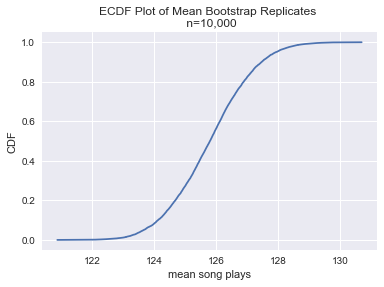

In [41]:
#Calculate ECDF

x3, y3 = ecdf(song_plays_mean_replicates)

#Graph actual cumulative sample distribution

plt.plot(x3, y3)

plt.title('ECDF Plot of Mean Bootstrap Replicates \n n=10,000')

plt.xlabel('mean song plays')

plt.ylabel('CDF')

plt.show()

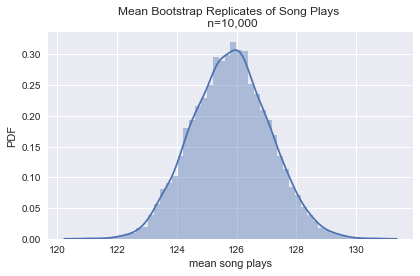

In [42]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(song_plays_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean song plays')

plt.title('Mean Bootstrap Replicates of Song Plays \n n=10,000')

plt.tight_layout()

In [43]:
stats.describe(song_plays_mean_replicates)

DescribeResult(nobs=10000, minmax=(120.88157723653347, 130.69948198655038), mean=125.79880313304521, variance=1.6682565038636745, skewness=0.0403010765382374, kurtosis=-0.06585267212611434)

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 125.79.

In [44]:
#Bootstrap confidence interval

ci_song_plays = np.percentile(song_plays_mean_replicates,[2.5,97.5])

print('Bootstrap Mean Replicates 95% CI: ',ci_song_plays)

Bootstrap Mean Replicates 95% CI:  [123.31497896 128.34195519]


The bootstrap mean replicates showes a 95% confidence interval for the population mean is between 123.31 and 128.34. This confidence interval is very close together. This range contains our sample mean of 125.79.

### D. Hypothesis Testing Using Bootstrap  Mean Replicates

The hypotheses to be tested are: 

> H0: Population mean is 125.79 song plays.

> Ha: Population mean is not 125.79 song plays.

> alpha = 0.05

In [45]:
song_mean = np.mean(song_plays.play)

In [46]:
print('P-value of song plays mean replicates: ', sum(song_plays_mean_replicates <= song_mean)/n_tries)

P-value of song plays mean replicates:  0.496


We cannot reject the null hypothesis that the population mean is 125.79 song plays.

### E. Hypothesis Testing Using a T-Test

* It is suspect that this data satifies the central limit theorem. As such, this test should be taken with suspicion. I have performed it for illustration purposes.

The hypotheses to be tested are: 

> H0: Population mean is 125.79 song plays.

> Ha: Population mean is not 125.79 song plays.

> alpha = 0.05

In [47]:
stats.ttest_1samp(song_plays.play,125.79)

Ttest_1sampResult(statistic=0.0031174387539440714, pvalue=0.9975126493949225)

The p-value is above the alpha level of 0.05. This suggets that we cannot reject the null hypothesis that the population mean is 125.79. We should take this results with some suspicion since this data may not satisfy the CLT.

**Sample Mean Hypothesis Testing & Distribution Conclusions**

**1-** The distribution is not normal.

**2-** According to the bootstrap replicates of the mean and the t-test is highly likely that the population song plays indicator mean is around 125.79.

**3-** There are several factors that could be driving these results and creating a peculiar song plays distribution:

* The user play dataset is very large. 
* The data was in a certain timeframe and procedure and we do not have full user listening history.
* The song data was extracted in December of 2011 which is holiday season, which could affect the user song play behaviour.
* There are specific characteristics of the user with high user play interactions (such as business customer, several people in the same account etc.). 
* The structure of the music industry, in which a few songs/artists create hits and most working artists do not.

## Part 4. Artist Listen Data Exploration and Inference

Below I grouped and summed the play indicator by artist id. This is to understand at a basic level how many song play interactions each artist has. 

In [48]:
#Merge song plays and artist id

artist_song_merge = songs[['song_id','artist_id']].merge(song_plays,on='song_id')

#Drop song id. We do not need this in this section.

artist_song_merge.drop('song_id',axis=1)

# Group the resulting dataframe by artist id. Sum the play indicator by artist id.

artist_plays = artist_song_merge.groupby('artist_id',as_index=False).sum().sort_values('play',ascending=False)

artist_plays.head()

,artist_id,play,play_count
11502,ARF2EHS1187B994F4E,241823,884464
15064,ARJ7KF01187B98D717,219796,504046
11734,ARFCWSZ123526A0AFD,196696,599248
18607,ARNCHOP121318C56B8,189426,646538
21837,ARR3ONV1187B9A2F59,189086,499413


**Calculate descriptive statistics of the artist_plays dataset.**

In [49]:
artist_plays.describe()

,play,play_count
count,29559.000000,29559.000000
mean,1367.438411,3895.820461
std,6498.707551,18704.714762
min,1.000000,1.000000
25%,20.000000,50.000000
50%,112.000000,323.000000
75%,569.500000,1699.000000
max,241823.000000,884464.000000


**Observations:**

* There are 29,559 unique songs that have been listened to. **This means that 66.5% of artists in th song dataset has been listened to.** 
* The play indicator has a mean of 1,367.44 and an standard deviation of 6,498.71. This means that the average artist has 1,367.44 unique listens for different unique users.
* The percentile distribution suggests a long tail somewhere. The 75% percentile is 569.50 songs and the max song plays is 241,823 unique user listens.

### B. Normality Testing: Histogram, Actual ECDF, Theoretical ECDF,  Skew, Kurtosis, D’Agostino-Pearson’s Test & Anderson-Darling Test

> Plot histograms of the user song plays indicator.

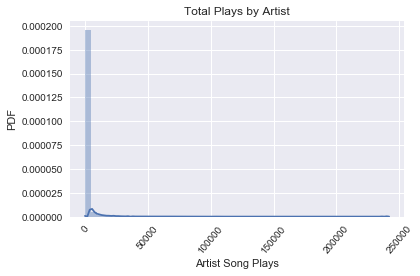

In [50]:
sns.set()

sns.distplot(artist_plays.play,norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('Artist Song Plays')

plt.title('Total Plays by Artist')

plt.xticks(rotation = 50)

plt.tight_layout()

([<matplotlib.axis.XTick at 0x1a0d4b8320>,
 <a list of 10 Text xticklabel objects>)

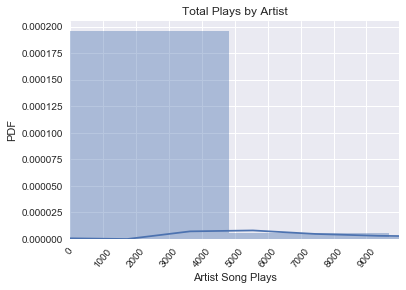

In [51]:
#Histogram of song listens when artist plays <=10000

sns.distplot(artist_plays.play)

plt.ylabel('PDF')

plt.xlabel('Artist Song Plays')

plt.title('Total Plays by Artist')

plt.xlim([0,10000])

x_ticks=np.arange(0,10000,1000)

plt.tight_layout()

plt.xticks(x_ticks,rotation = 50)

The two histograms above suggests a very long tail somewhere. The distribution **does not look** normal.

>  **The next five (5) cells create ECDF plots of actual and theoretically normal user listens data. Compare actual distribution to theoretically normal distribution.**

> Create theoretically normal distribution of the song play indicator.

In [52]:
# Calculate mean of  and standard deviation of user play indicator

mean_artist_play = np.mean(artist_plays.play)

std_artist_play = np.std(artist_plays.play)

#Generate 29,559 samples (the same as sample size) from mean and standard deviation. Set seed to 42.

np.random.seed(42)

samples3 = np.random.normal(mean_artist_play, std_artist_play, size=29559)

> Calculate ECDF of actual and theorectical song plays.

In [53]:
#Calculate actual and theoretical ECDF of artist plays

x4, y4 = ecdf(artist_plays.play)

x_theor4, y_theor4 = ecdf(samples3)

> Graph ECDF plot of actual song plays.

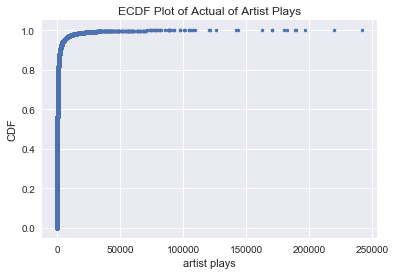

In [54]:
#Graph actual cumulative sample distribution

plt.plot(x4, y4, marker='.', linestyle='none')

plt.title('ECDF Plot of Actual of Artist Plays')

plt.xlabel('artist plays')

plt.ylabel('CDF')

plt.show()

> Graph ECDF plot of theoretically normal artist plays.

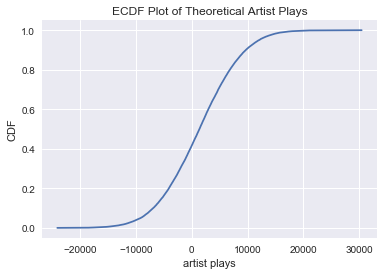

In [55]:
#Graph theoretical sample distribution

plt.plot(x_theor4, y_theor4)

plt.title('ECDF Plot of Theoretical Artist Plays')

plt.xlabel('artist plays')

plt.ylabel('CDF')

plt.show()

**Comparison of Actual ECDF and Theoretically Normal ECDF:** There is a large difference between the shape and range of the actual distribution and the theoretically normal distribution. It is worth noting that in this case, negative values are physically imposible, an song cannot have negative listens.

Calculate Basic Distribution Statistics

In [56]:
stats.describe(artist_plays.play)

DescribeResult(nobs=29559, minmax=(1, 241823), mean=1367.4384113129672, variance=42233199.83218175, skewness=15.128311526185414, kurtosis=344.3738338390043)

The kurtosis and skewedness statistics suggest high levels of positive skewdness and kurtosis.

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [57]:
# D’Agostino and Pearson’s Normality Test

print('D’Agostino and Pearson’s: ',stats.normaltest(artist_plays.play))

# Anderson-Darling Normality Test

print('Anderson-Darling: ',stats.anderson(artist_plays.play))

D’Agostino and Pearson’s:  NormaltestResult(statistic=56969.6350526378, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=8001.315298262532, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


**Normality Tests Results:** 

* **D’Agostino and Pearson’s Test:** The test p-value is less than the set alpha level of 0.05. In this case, the null hypothesis is rejected and accept the hypothesis that the distribution is not normal.

* **Anderson-Darling Test:** The statistic is much greater than the critical values, at all levels of statistical significance. This means the null hypothesis that the distrinution is normal can be rejected and accept that is not normal.

**Normality Testing Conclusions:** 

* The histogram, ECDF plots, Kurtosis, Skewdness and the D’Agostino and Pearson’s Normality Test suggests that the user play data as it currently stands is **not normally distributed**.

**Central Limit Theorem:** I do not think this data satifies the central limit theorem.

* Independence: To satisfy this condition we will need to assume that the artistplay count is independent of the play count of another song.  In this case, I think this may not be not a reasonable assumption to make due to popularity, artists similarity, song similarity and how the echo nest service decided to show the catalog to their users. However, it may be a reasonable assumption that this sample represents <10% of the artist population. 

* Randomness: The Echo Nest randomly selected a sample of users whose play counts matched to the song ID's in the dataset.

* Sample Size > 30: The sample size is greater than 30.

### C. Confidence Interval of the Mean Using Bootstrap

I will use the bootstrap method to calculate confidence intervals for the mean, because the sample distribution is NOT normal. Parametric confidence interval formulas assume the sample is normal.

Generate Bootstrap Replicates of the Song Plays Mean

In [58]:
artist_plays_mean_replicates = bs_sample(artist_plays.play,np.mean,n_tries)

Create ECDF and Histogram Plots Bootstrapped Means

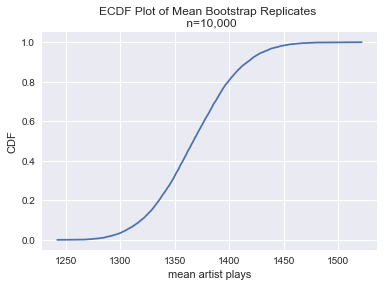

In [59]:
#Calculate ECDF

x5, y5 = ecdf(artist_plays_mean_replicates)

#Graph actual cumulative sample distribution

plt.plot(x5, y5)

plt.title('ECDF Plot of Mean Bootstrap Replicates \n n=10,000')

plt.xlabel('mean artist plays')

plt.ylabel('CDF')

plt.show()

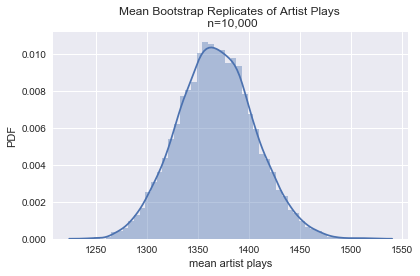

In [60]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(artist_plays_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean artist plays')

plt.title('Mean Bootstrap Replicates of Artist Plays \n n=10,000')

plt.tight_layout()

In [61]:
stats.describe(artist_plays_mean_replicates)

DescribeResult(nobs=10000, minmax=(1242.3381711153963, 1521.5049223586725), mean=1367.6702836192023, variance=1426.8069023072014, skewness=0.10321589778993323, kurtosis=-0.021271032238975973)

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 1,367.44.

In [62]:
#Bootstrap confidence interval

ci_artist_plays = np.percentile(artist_plays_mean_replicates,[2.5,97.5])

print('Bootstrap Mean Replicates 95% CI: ',ci_artist_plays)

Bootstrap Mean Replicates 95% CI:  [1294.92998495 1443.77536791]


The bootstrap mean replicates showes a 95% confidence interval for the population mean is between 1,294.93 and 1443.78. This range contains our sample mean of 1,367.44.

### D. Hypothesis Testing Using Bootstrap  Mean Replicates

The hypotheses to be tested are: 

> H0: Population mean is 1,367.44 artist plays.

> Ha: Population mean is not 1,367.44 artist plays.

> alpha = 0.05

In [63]:
artist_mean = np.mean(artist_plays.play)

In [64]:
print('P-value of song plays mean replicates: ', sum(artist_plays_mean_replicates <= artist_mean)/n_tries)

P-value of song plays mean replicates:  0.5033


We cannot reject the null hypothesis that the population mean is 1,367.44 artist plays.

### E. Hypothesis Testing Using a T-Test

* It is suspect that this data satifies the central limit theorem. As such, this test should be taken with suspicion. I have performed it for illustration purposes.

The hypotheses to be tested are: 

> H0: Population mean is 1,367.44 artist plays.

> Ha: Population mean is not 1,367.44 artist plays.

> alpha = 0.05

In [65]:
stats.ttest_1samp(artist_plays.play,1367.44)

Ttest_1sampResult(statistic=-4.2029693781379284e-05, pvalue=0.9999664654398812)

The p-value is above the alpha level of 0.05. This suggets that we cannot reject the null hypothesis that the population mean is 1,367.44. We should take this results with some suspicion since this data may not satisfy the CLT.

**Sample Mean Hypothesis Testing & Distribution Conclusions**

**1-** The distribution is not normal.

**2-** According to the bootstrap replicates of the mean and the t-test is highly likely that the population song plays indicator mean is around 125.79.The t-test should be taken with some suspicion since this distribution may not satisfy the central limit theorem.

**3-** There are several factors that could be driving these results and creating a peculiar artist plays distribution:

* The user play dataset is very large. 
* The data was in a certain timeframe and procedure and we do not have full user listening history.
* The song data was extracted in December of 2011 which is holiday season, which could affect the user song play behaviour.
* There are specific characteristics of the user with high user play interactions (such as business customer, several people in the same account etc.). 
* The structure of the music industry, in which a few songs/artists create hits and most working artists do not.

## Part 5. Relationship between song features and listens

Merge song basic features with song listens indicator total (merge on song_id)

In [66]:
#Merge song basic features with song listens indicator total (merge on song_id)

basic_features_listens = basic_features.merge(song_plays,on='song_id',how='left')

basic_features_listens.head()

,artist_familiarity,artist_hotttnesss,artist_id,song_hotttnesss,song_id,duration,key,loudness,mode,tempo,time_signature,year,play,play_count
0,0.649822,0.394032,ARYZTJS1187B98C555,0.542899,SOQMMHC12AB0180CB8,252.05506,10,-4.829,0,87.002,4,2003.0,3.0,8.0
1,0.439604,0.356992,ARMVN3U1187FB3A1EB,0.299877,SOVFVAK12A8C1350D9,156.55138,9,-10.555,1,150.778,1,1995.0,NaN,NaN
2,0.643681,0.437504,ARGEKB01187FB50750,0.617871,SOGTUKN12AB017F4F1,138.97098,7,-2.060,1,177.768,4,2006.0,NaN,NaN
3,0.448501,0.372349,ARNWYLR1187B9B2F9C,NaN,SOBNYVR12A8C13558C,145.05751,7,-4.654,1,87.433,4,2003.0,3.0,3.0
4,0.000000,0.000000,AREQDTE1269FB37231,NaN,SOHSBXH12A8C13B0DF,514.29832,5,-7.806,0,140.035,4,NaN,NaN,NaN


**Plot heatmap of relationship between features**

In [67]:
song_feat_corr = basic_features_listens.corr()

Text(0.5,1,'Heat Map of  Song Features Correlations')

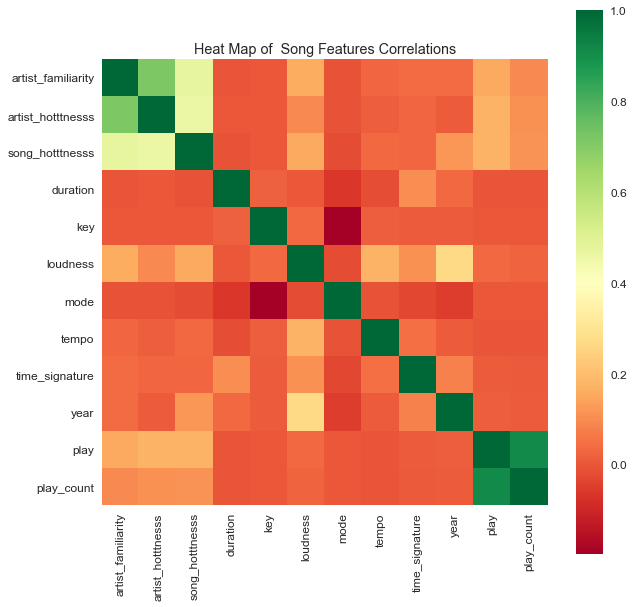

In [68]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=1.2)

sns.heatmap(song_feat_corr, square=True, cmap='RdYlGn')

plt.title('Heat Map of  Song Features Correlations')

+ Relationship between play and play count. Makes sense because play is an indicator derived from play count and also, due to popularity effects in which more popular songs will be played more. 
+ Morederate positive elationship between artist_familiarity, artist_hottness and song_hottness. It seesm to be related to popularity effect.

**Plot relationship between artist familiarity and plays** (only songs that have been played plotted)

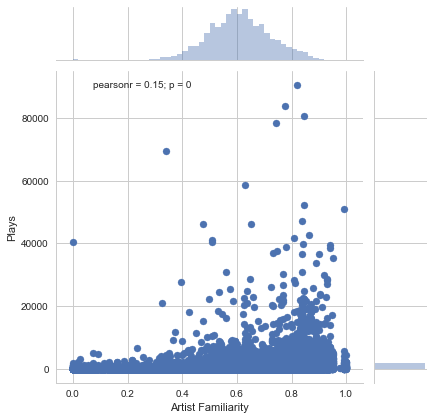

In [69]:
sns.set(style='whitegrid')

plays_artistfam = sns.jointplot(x= 'artist_familiarity', y= 'play',
                                data=basic_features_listens,dropna=True)

plays_artistfam.set_axis_labels('Artist Familiarity','Plays')

plays_artistfam.savefig('plays_artistfam_joint.png', dpi=400)

**Plot relationship between artist hottness and plays** (only songs that have been played plotted)

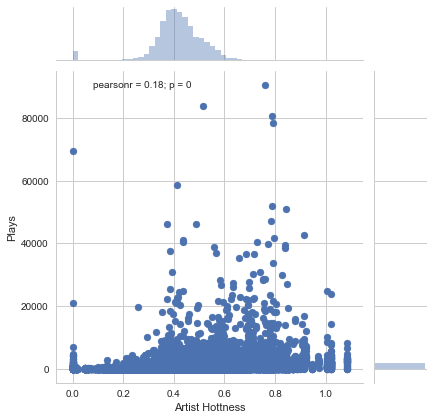

In [70]:
plays_artisthott = sns.jointplot(x= 'artist_hotttnesss', y= 'play',
                                data=basic_features_listens,dropna=True)

plays_artisthott.set_axis_labels('Artist Hottness','Plays')

plays_artisthott.savefig('plays_artist_hot_joint.png', dpi=400)

**Plot relationship between song hottness and plays** (only songs that have been played plotted)

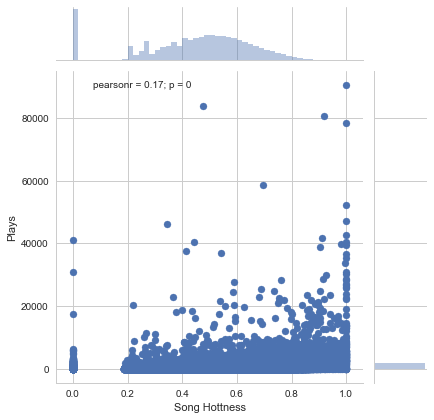

In [71]:
plays_songhott = sns.jointplot(x= 'song_hotttnesss', y= 'play',
                                data=basic_features_listens,dropna=True)

plays_songhott.set_axis_labels('Song Hottness','Plays')

plays_songhott.savefig('plays_song_hot_joint.png', dpi=400)

**Plot relationship between song duration and plays** (only songs that have been played plotted)

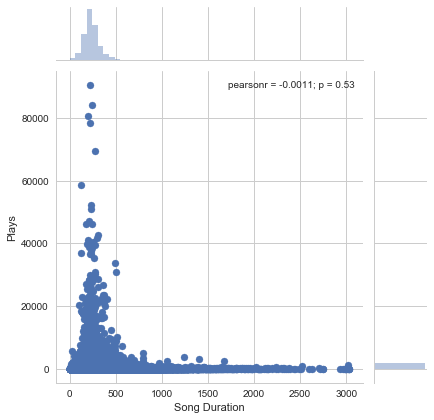

In [72]:
plays_dur = sns.jointplot(x= 'duration', y= 'play',
                         data=basic_features_listens,dropna=True)

plays_dur.set_axis_labels('Song Duration','Plays')

plays_dur.savefig('plays_song_dur_joint.png', dpi=400)

**Plot relationship between song key and plays** (only songs that have been played plotted)

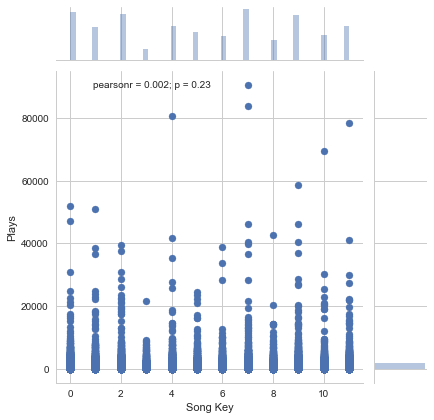

In [73]:
plays_key = sns.jointplot(x= 'key', y= 'play',
                         data=basic_features_listens,dropna=True)

plays_key.set_axis_labels('Song Key','Plays')

plays_key.savefig('plays_song_key_joint.png', dpi=400)

**Plot relationship between song loudness and plays** (only songs that have been played plotted)

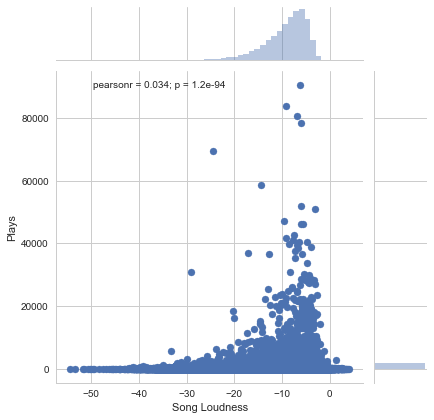

In [74]:
plays_loud = sns.jointplot(x= 'loudness', y= 'play',
                         data=basic_features_listens,dropna=True)

plays_loud.set_axis_labels('Song Loudness','Plays')

plays_loud.savefig('plays_song_loud_joint.png', dpi=400)

**Plot relationship between song mode and plays** (only songs that have been played plotted)

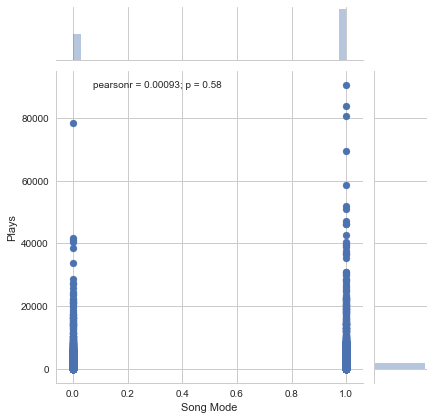

In [75]:
plays_mode = sns.jointplot(x= 'mode', y= 'play',
                         data=basic_features_listens,dropna=True)

plays_mode.set_axis_labels('Song Mode','Plays')

plays_mode.savefig('plays_song_mode_joint.png', dpi=400)

**Plot relationship between tempo and plays** (only songs that have been played plotted)

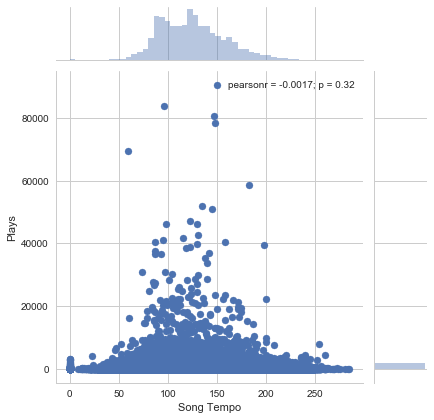

In [76]:
plays_tempo = sns.jointplot(x= 'tempo', y= 'play',
                         data=basic_features_listens,dropna=True)

plays_tempo.set_axis_labels('Song Tempo','Plays')

plays_tempo.savefig('plays_song_mode_joint.png', dpi=400)

**Plot relationship between time signature and plays** (only songs that have been played plotted)

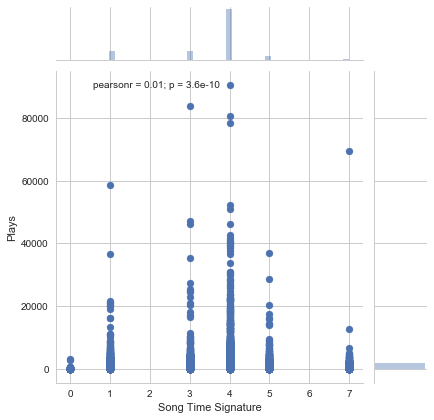

In [77]:
plays_timesig = sns.jointplot(x= 'time_signature', y= 'play',
                         data=basic_features_listens,dropna=True)

plays_timesig.set_axis_labels('Song Time Signature','Plays')

plays_timesig.savefig('plays_song_timesig_joint.png', dpi=400)

**Plot relationship between year of song release and plays** (only songs that have been played plotted)

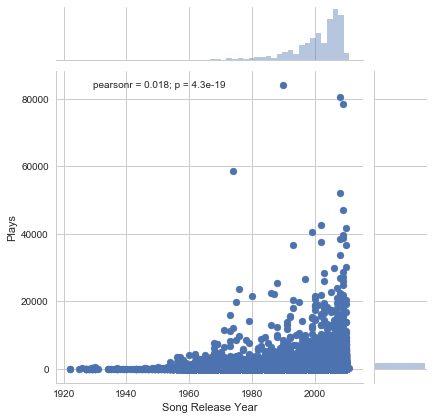

In [78]:
plays_year = sns.jointplot(x= 'year', y= 'play',
                              data=basic_features_listens,dropna=True)

plays_year.set_axis_labels('Song Release Year','Plays')

plays_year.savefig('plays_song_year_joint.png', dpi=400)

**Plot relationship between play count and play** (only songs that have been played plotted)

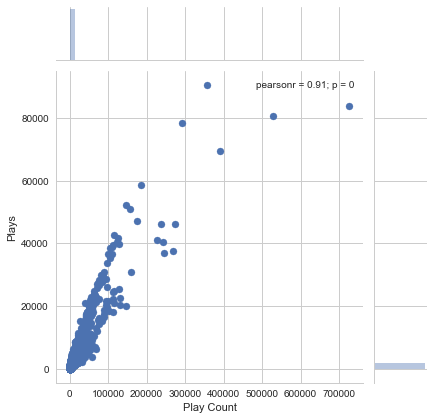

In [79]:
plays_count = sns.jointplot(x= 'play_count', y= 'play',
                            data=basic_features_listens,dropna=True)

plays_count.set_axis_labels('Play Count','Plays')

plays_count.savefig('plays_song_count_joint.png', dpi=400)
                            

There seems to be a strong linear relationship between play count and plays. This means that there is a tendency in that the higher the play counts, the higher the number of unique user plays. This makes sense and ought to be expected given that the play indicator is derived from the play count. 

However, the strenght of the relationship leads me to think that song/artist popularity maybe an important factor in song/artist/user interactions (i.e. the more people hear about a song/artist the more likely they are to interact with it and have play it more).

**Conclusions**

* There does not seem to be a strong relationship between unique song plays/interactions and any of the features.
* This could be due to the sparsity of the data. For example, most users having not listened to that much of the catalog to result in meaningful patterns.
* The songs may be simply too heterogeneous/different.
* They may be patterns or correlations if features are looked at in combination rather than isolated.

## Part 6. Artist Tags

While I do not forsee using the tags data in the recommder system at this point, I think is still helpful to get a broad sense of kinds of genre and tags that are associated with the artists in the dataset.

**MusicBrainz Artist Tags Exploration: Count how many artists are associated with a tag.**

In [80]:
mbtag_counts = artist_tags[['mbtag','artist_id']].groupby('mbtag',as_index=False).count()

print(mbtag_counts.describe())

print('Unique tags and artist values:',
      artist_tags[['mbtag','artist_id']].nunique())

          artist_id
count   2321.000000
mean     343.879793
std     2032.004393
min        1.000000
25%       25.000000
50%       43.000000
75%      104.000000
max    38597.000000
Unique tags and artist values: mbtag         2321
artist_id    43946
dtype: int64


There is a total of 2,321 unique tags. The average tag has ~344 unique artists associated with it. There seems to be skewedness, 75% of the tags have 104 artists while the maximum artists associated with a tag is ~38.5K.

As discussed previously there are 44,421 unique artists in the song dataset. So this means that 98% of artists in the MSD dataset has one or more MusicBrainz tag.

**Create Horizontal Bar plot of the most popular artist MusicBrainz tags**

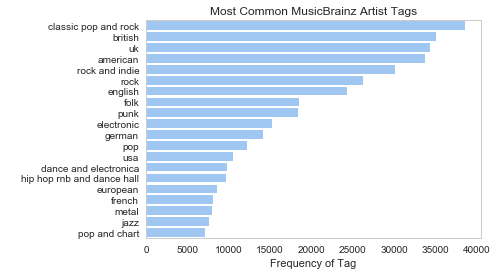

In [81]:
#Extract top 20 tags.

mbtag_counts_top = mbtag_counts.sort_values('artist_id',ascending=False).head(20)

#Create bar graph of top 20 artist tags

sns.set(style="whitegrid")

sns.set_color_codes("pastel")

bar_tags = sns.barplot(y='mbtag',x='artist_id', data=mbtag_counts_top, color='b')

plt.grid(False)

plt.title('Most Common MusicBrainz Artist Tags') #add title

plt.ylabel(' ') #blank y-axis label

plt.xlabel('Frequency of Tag') #add x-axis label

plt.show() #show resulting graph

bar_tags_figure = bar_tags.get_figure()

bar_tags_figure.savefig('Artist Tags_Top20.png', dpi=400)

It seems classic pop, rock, british, uk, american indie, english and folk are the most popular artists tags in the MusicBrainz data.

**EchoNest Artist Terms Exploration: Count how many artists are associated with a tag.**

In [82]:
term_counts = artist_tags[['terms','artist_id']].groupby('terms',as_index=False).count()

print(term_counts.describe())

print('Unique tags and artist values:',
      artist_tags[['terms','artist_id']].nunique())

          artist_id
count   7643.000000
mean     212.104933
std     1310.005104
min        1.000000
25%        2.000000
50%        7.000000
75%       32.000000
max    40843.000000
Unique tags and artist values: terms         7643
artist_id    43946
dtype: int64


There is a total of 7,643 unique tags. The average tag has ~212 unique artists associated with it. There seems to be some skewedness, 75% of the tags have 32 unique artists while the maximum artists associated with a tag is ~40.8K.

As discussed previously, there are 44,421 unique artists in the song dataset. unique artists in the dataset. So this means that 98% of artists in the MSD dataset has one or more EchoNest tag.

The Echo Nest has almost 3x more unique tags than the Music Brainz array.

**Create Horizontal Bar plot of the most popular artist Echo Nest terms**

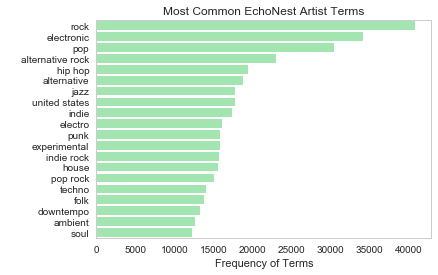

In [83]:
#Extract top 20 tags.

term_counts_top = term_counts.sort_values('artist_id',ascending=False).head(20)


#Create bar graph of top 20 artist terms

sns.set(style="whitegrid")

sns.set_color_codes("pastel")

bar_terms = sns.barplot(y='terms',x='artist_id', data=term_counts_top, color='g')

plt.title('Most Common EchoNest Artist Terms') #add title

plt.grid(False)

plt.ylabel(' ') #blank y-axis label

plt.xlabel('Frequency of Terms') #add x-axis label

plt.show() #show resulting graph

bar_terms_figure = bar_terms.get_figure()

bar_terms_figure.savefig('Artist Terms_Top20.png', dpi=400)

It seems that rock, electronic, pop, hip hop, alternative and jazz the most popular artists terms in the Echo Nest data. Rock intersects with the top tags of the MusicBrainz.

# End of Notebook